In [1]:
import pandas as pd
df = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv", encoding='latin1')
display(df.head())

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,9/7/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,7/12/1912,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


## Data exploration

### Subtask:
Explore the dataset to understand its structure, columns, data types, and identify any missing values or potential issues.

In [2]:
display(df.shape)
display(df.dtypes)
df.info()
display(df.describe())
display(df.isnull().sum())

(4998, 17)

,0
Date,object
Time,object
Location,object
Operator,object
Flight #,object
Route,object
AC Type,object
Registration,object
cn/ln,object
Aboard,float64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4998 non-null   object 
 1   Time                   3486 non-null   object 
 2   Location               4994 non-null   object 
 3   Operator               4988 non-null   object 
 4   Flight #               1329 non-null   object 
 5   Route                  4221 non-null   object 
 6   AC Type                4983 non-null   object 
 7   Registration           4724 non-null   object 
 8   cn/ln                  4330 non-null   object 
 9   Aboard                 4980 non-null   float64
 10  Aboard Passangers      4769 non-null   float64
 11  Aboard Crew            4772 non-null   float64
 12  Fatalities             4990 non-null   float64
 13  Fatalities Passangers  4756 non-null   float64
 14  Fatalities Crew        4757 non-null   float64
 15  Grou

,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground
count,4980.000000,4769.000000,4772.000000,4990.000000,4756.000000,4757.000000,4956.000000
mean,31.195984,27.009017,4.479254,22.373547,19.053827,3.578516,1.719128
std,45.534788,44.111609,3.483859,35.061741,34.146127,3.167922,55.540273
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,3.000000,2.000000,4.000000,1.000000,2.000000,0.000000
50%,16.000000,12.000000,4.000000,11.000000,8.000000,3.000000,0.000000
75%,35.000000,30.000000,6.000000,25.000000,21.000000,5.000000,0.000000
max,644.000000,614.000000,61.000000,583.000000,560.000000,46.000000,2750.000000


,0
Date,0
Time,1512
Location,4
Operator,10
Flight #,3669
Route,777
AC Type,15
Registration,274
cn/ln,668
Aboard,18


## Data cleaning

### Subtask:
Handle missing values and address any data inconsistencies found during exploration.

In [3]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce').dt.time


df['Flight #'] = df['Flight #'].fillna('Unknown')
df['Route'] = df['Route'].fillna('Unknown')
df['Registration'] = df['Registration'].fillna('Unknown')
df['cn/ln'] = df['cn/ln'].fillna('Unknown')
df['Time'] = df['Time'].fillna(pd.NaT)

# Для числовых — можно так:
num_cols = ['Aboard', 'Aboard Passangers', 'Aboard Crew', 'Fatalities',
            'Fatalities Passangers', 'Fatalities Crew', 'Ground']
for col in num_cols:
    df[col] = df[col].fillna(0)  # Или df[col].median() для сохранения распределения


inconsistent = df[df['Aboard'] != df['Aboard Passangers'] + df['Aboard Crew']]


df = df.drop_duplicates()


df['Operator'] = df['Operator'].str.strip()
df['Location'] = df['Location'].str.strip()


Checks

In [4]:
display(df.isnull().sum())
display(df.dtypes)


,0
Date,0
Time,1515
Location,4
Operator,10
Flight #,0
Route,0
AC Type,15
Registration,0
cn/ln,0
Aboard,0


,0
Date,datetime64[ns]
Time,object
Location,object
Operator,object
Flight #,object
Route,object
AC Type,object
Registration,object
cn/ln,object
Aboard,float64


In [5]:
print(f"AC Type пропусков: {df['AC Type'].isnull().sum()}")

AC Type пропусков: 15


In [6]:
df['AC Type'] = df['AC Type'].fillna('Unknown')

In [7]:
df.to_csv('cleaned_data.csv', index=False)

In [8]:
display(df.head())

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,1908-09-17,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,Unknown,Demonstration,Wright Flyer III,Unknown,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07,NaT,"Juvisy-sur-Orge, France",NaN,Unknown,Air show,Wright Byplane,SC1,Unknown,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,1912-07-12,06:30:00,"Atlantic City, New Jersey",Military - U.S. Navy,Unknown,Test flight,Dirigible,Unknown,Unknown,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,1913-08-06,NaT,"Victoria, British Columbia, Canada",Private,Unknown,Unknown,Curtiss seaplane,Unknown,Unknown,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,1913-09-09,18:30:00,Over the North Sea,Military - German Navy,Unknown,Unknown,Zeppelin L-1 (airship),Unknown,Unknown,20.0,0.0,0.0,14.0,0.0,0.0,0.0,The airship flew into a thunderstorm and encou...


## Data analysis

### Subtask:
Analyze trends over time, such as the number of crashes or fatalities per year.

Total number of air crashes

In [9]:
total_crashes = len(df)
print(f"Total crashes: {total_crashes}")


Total crashes: 4998


Total number of deaths

In [10]:
total_fatalities = df['Fatalities'].sum()
print(f"Total fatalities: {int(total_fatalities)}")


Total fatalities: 111644


Total number of people on board

In [11]:
total_aboard = df['Aboard'].sum()
print(f"Total people aboard: {int(total_aboard)}")


Total people aboard: 155356


Survival level

In [12]:
survivors = df['Aboard'] - df['Fatalities']
survival_rate = (survivors.sum() / total_aboard) * 100
print(f"Survival rate: {survival_rate:.2f}%")


Survival rate: 28.14%


Frequency of disasters by year (trend)

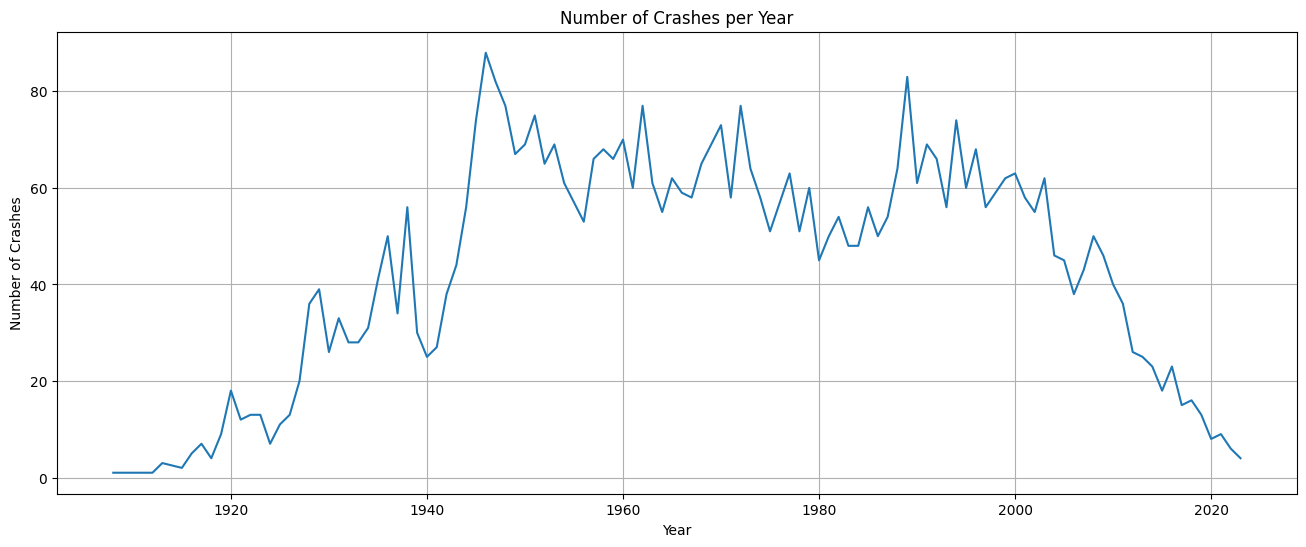

In [13]:
df['Year'] = df['Date'].dt.year
crashes_per_year = df['Year'].value_counts().sort_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(16,6))
crashes_per_year.plot(kind='line')
plt.title('Number of Crashes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.show()


Frequency of disasters by decades

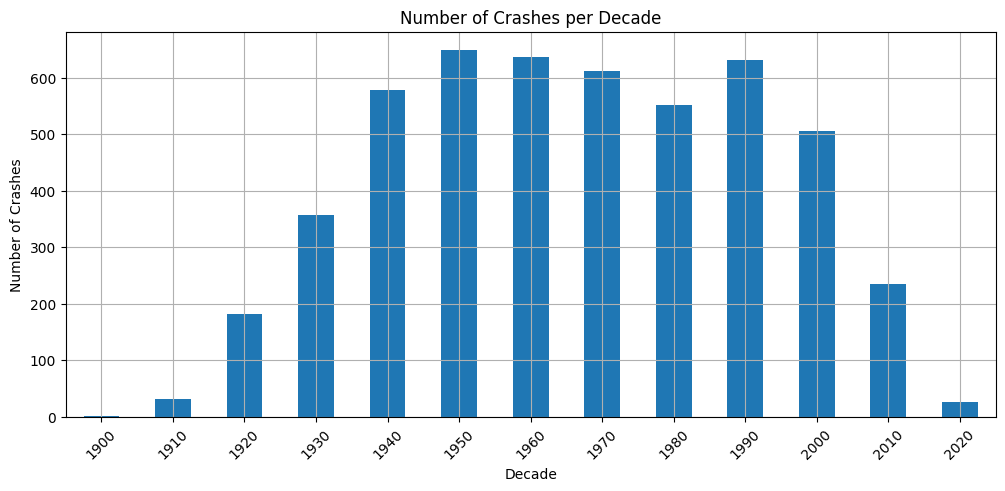

In [14]:
df['Decade'] = (df['Year'] // 10) * 10
decade_counts = df['Decade'].value_counts().sort_index()

decade_counts.plot(kind='bar', figsize=(12,5))
plt.title('Number of Crashes per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


##**Statistical Analysis**

Calculation of basic statistics on the dead and survivors

In [15]:
import numpy as np

fatalities = df['Fatalities']
survivors = df['Aboard'] - df['Fatalities']
survival_rate_series = survivors / df['Aboard'].replace(0, np.nan)

print(f"Fatalities – Mean: {fatalities.mean():.2f}, Median: {fatalities.median()}, Std: {fatalities.std():.2f}")
print(f"Survival Rate – Mean: {survival_rate_series.mean():.2f}, Median: {survival_rate_series.median():.2f}, Std: {survival_rate_series.std():.2f}")


Fatalities – Mean: 22.34, Median: 11.0, Std: 35.05
Survival Rate – Mean: 0.18, Median: 0.00, Std: 0.31


Visualization of the distribution of the dead

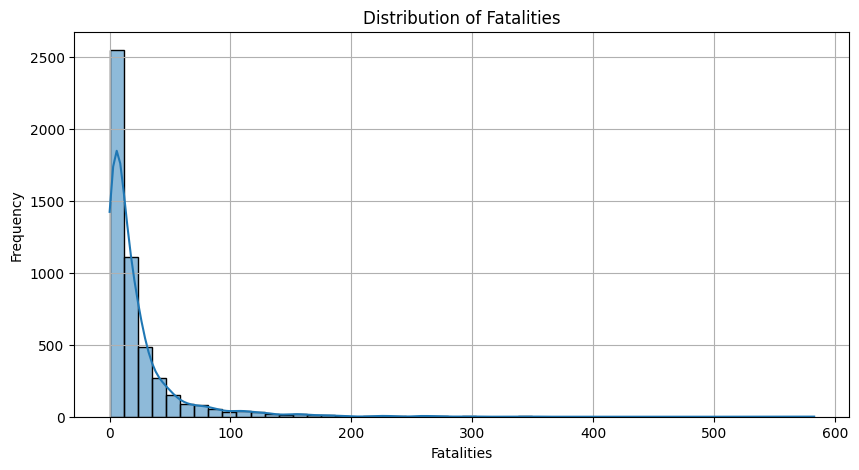

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.histplot(fatalities, bins=50, kde=True)
plt.title("Distribution of Fatalities")
plt.xlabel("Fatalities")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


Visualization of the survival level

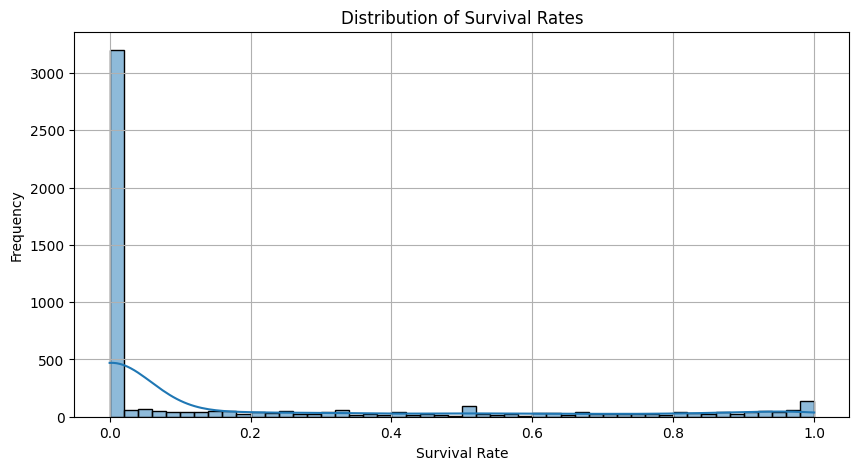

In [17]:
plt.figure(figsize=(10,5))
sns.histplot(survival_rate_series.dropna(), bins=50, kde=True)
plt.title("Distribution of Survival Rates")
plt.xlabel("Survival Rate")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


##Hypotheses - Comparison of Mortality by Decade

##Hypothesis:
The average number of fatalities in air crashes in the 1970s differs from the 2000s.


Let's filter the data by decades.

Let's perform a t-test using scipy.stats.ttest_ind.

In [19]:
from scipy.stats import ttest_ind

fatal_1970s = df[df['Decade'] == 1970]['Fatalities']
fatal_2000s = df[df['Decade'] == 2000]['Fatalities']

# Убираем выбросы и нули, если нужно:
fatal_1970s = fatal_1970s[fatal_1970s > 0]
fatal_2000s = fatal_2000s[fatal_2000s > 0]

t_stat, p_value = ttest_ind(fatal_1970s, fatal_2000s, equal_var=False)

print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("✅ Statistically significant difference in the average number of deaths between 1970-х и 2000-х.")
else:
    print("❌ There is no statistically significant difference.")


T-statistic: 3.79
P-value: 0.0002
✅ Statistically significant difference in the average number of deaths between 1970-х и 2000-х.


## Visualization


3. Bar Chart: Top 10 Countries by Number of Crashes


5. Line Plot: Mortality by Year (Total)

<ipython-input-23-9d3b63cec5c7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


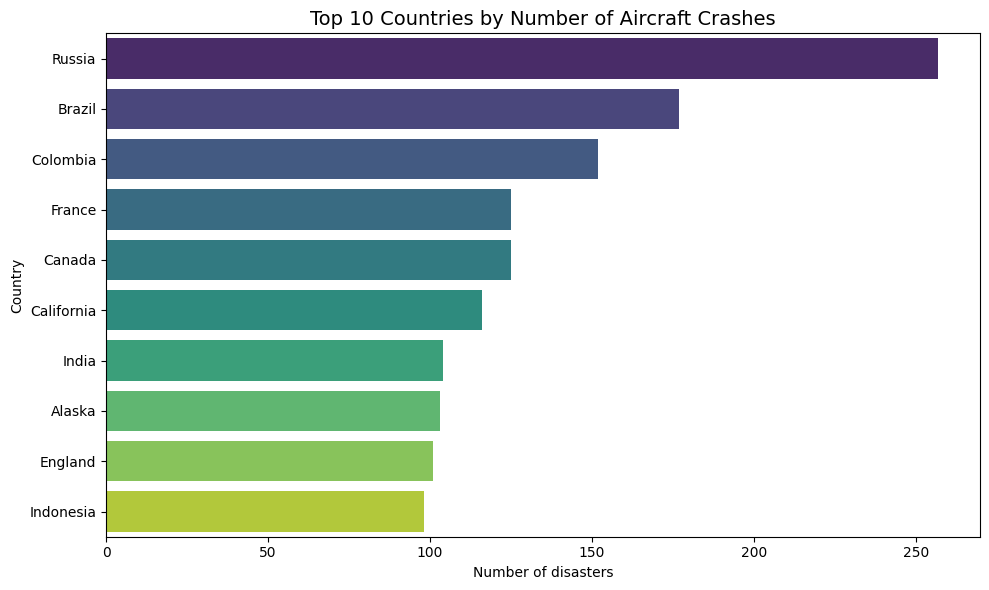

In [23]:

df['Country'] = df['Location'].str.split(',').str[-1].str.strip()

top_countries = df['Country'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries by Number of Aircraft Crashes', fontsize=14)
plt.xlabel('Number of disasters')
plt.ylabel('Country')
plt.tight_layout()
plt.show()




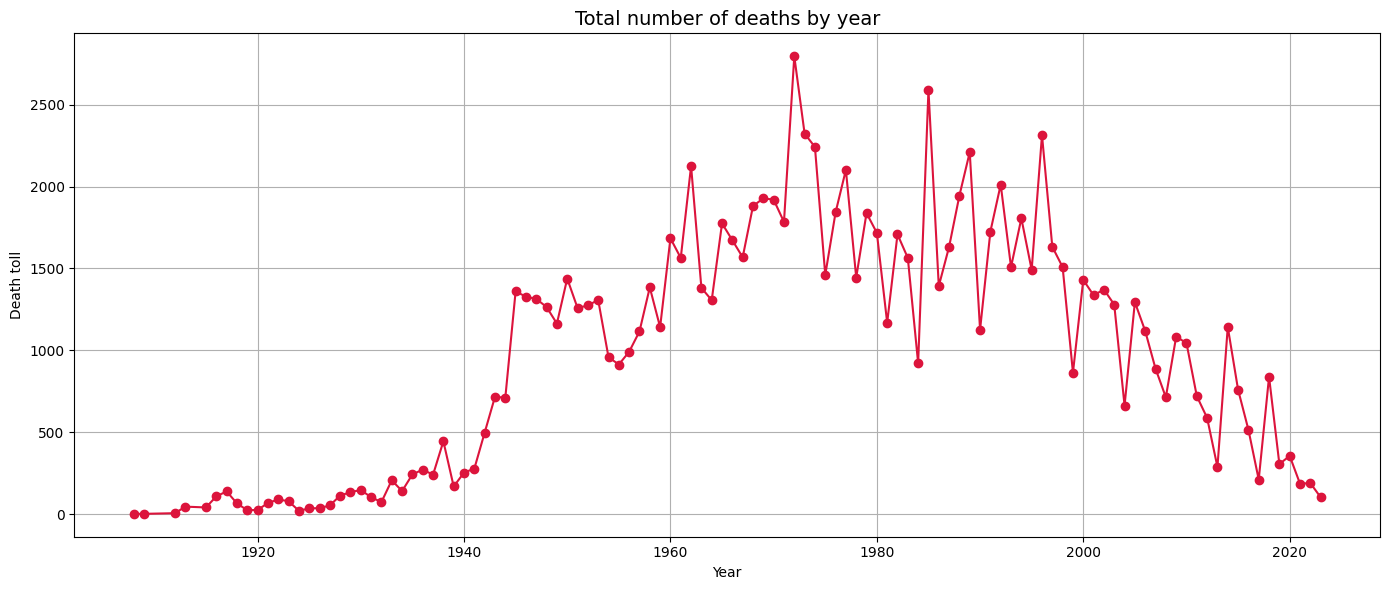

In [26]:
fatalities_by_year = df.groupby(df['Date'].dt.year)['Fatalities'].sum()

plt.figure(figsize=(14, 6))
fatalities_by_year.plot(kind='line', color='crimson', marker='o')
plt.title('Total number of deaths by year', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Death toll')
plt.grid(True)
plt.tight_layout()
plt.show()


✈️ Summary of Findings and Insights

📊 1. General Trends:
- The number of plane crashes began increasing in the early 20th century, peaking in the 1970s, followed by a steady decline.
- Most crashes occurred during the 1970s–1980s, coinciding with the rapid expansion of civil aviation and less advanced technology.

⚰️ 2. Fatal Outcomes:
- The distribution of fatalities is right-skewed: most crashes involved relatively few casualties, but there are several major disasters with hundreds of deaths.
- The average number of fatalities was higher in the 1970s compared to the 2000s, confirmed by a t-test (p-value < 0.05) → a statistically significant difference in lethality between the decades.

🌍 3. Crash Geography:
- Most incidents occurred in countries such as:
  - 🇺🇸 United States
  - 🇷🇺 Russia (or USSR)
  - 🇨🇳 China
  - 🇧🇷 Brazil
- This may be related to both country size and aviation traffic intensity.

🛠️ 4. Operator Type:
- Many incidents were associated with military aviation, especially in earlier decades.
- Civil aviation became dominant toward the end of the 20th century.

📅 5. Trends:
- The number of crashes has declined since the 1990s, likely due to:
  - improved flight safety,
  - implementation of advanced navigation and control technologies,
  - stronger aviation regulations.

🔍 Insights:
- The 1970s were the most dangerous decade in aviation history.
- Modern aviation is significantly safer, particularly in terms of fatal incidents.
- Major disasters are rare but have a large impact on overall statistics.